## Epistemic Uncertainty

## Generate sample dataset

In [1]:
import pandas as pd
import torch
from scipy import stats
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
from uqX.modeling.uqXBnnModel import uqXBnnModel


def sample_dataset(start, end, n):
    x = np.linspace(start, end, n)
    sample_mean = [math.sin(i/2) for i in x]
    sample_var = [((abs(start)+abs(end))/2 - abs(i))/16 for i in x]
    y = stats.norm(sample_mean, sample_var).rvs()
    return x, y

start = -7
end = 7
n = 300

x_train, y_train = sample_dataset(start, end, n)
x_test, y_test = sample_dataset(-10, 10, 300)

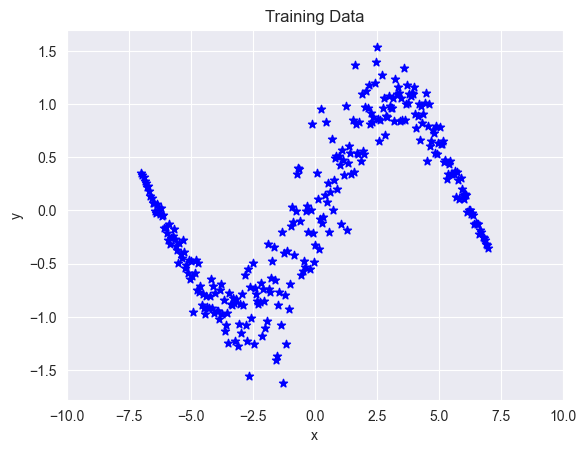

In [2]:
plt.scatter(x_train, y_train, c="blue", marker="*")
plt.xlim([-10, 10])
plt.title("Training Data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Using the BNN Model 

In [3]:
# Initialize the model

x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

input_dim = x_train.shape[1]

bnn_model = uqXBnnModel(input_dim=input_dim, hidden_size=32)

# Train the model
bnn_model.train_model(x_train, y_train, epochs=100, batch_size=32, learning_rate=0.01)

# bnn_model.save_model('../models/trained_bnn_model.pth')
# bnn_model.load_model('../models/trained_bnn_model.pth')
# Generate the plot


Epoch 0/100, Loss: 17.493248558044435
Epoch 20/100, Loss: 13.552427101135255
Epoch 40/100, Loss: 10.667658805847168
Epoch 60/100, Loss: 7.767976903915406
Epoch 80/100, Loss: 5.022823143005371


C:\Users\Studium\Documents\uni\bachelorarbeit\uqX\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Studium\Documents\uni\bachelorarbeit\uqX\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Studium\Documents\uni\bachelorarbeit\uqX\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Studium\Documents\uni\bachelorarbeit\uqX\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

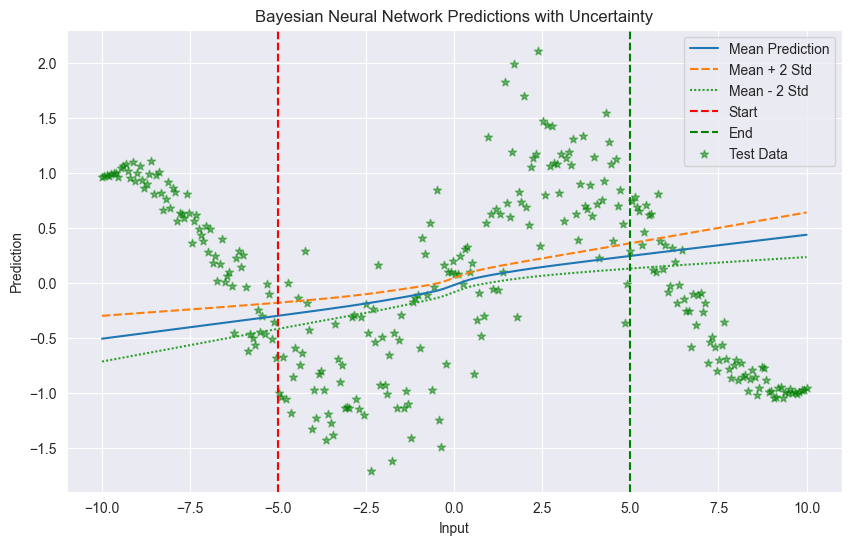

In [4]:
bnn_model.make_bnn_plot(x_test, y_test=y_test, samples=500, start=-5, end=5)